
## MED 3

# Regresja wielomianowa
Celem laboratorium jest napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych z wykresu. Wyznaczenie parametrów modelu ma się odbyć poprzez wykorzystanie pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji. Aproksymatorem będzie model regresji wielomianowej. 

Wczytanie niezbędnych bibliotek


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

Celem zadania regresji jest znalezienie wektora $w$ (wektor wartości parametrów).

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (SSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$SSE(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $\omega$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right| $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right| $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right| $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

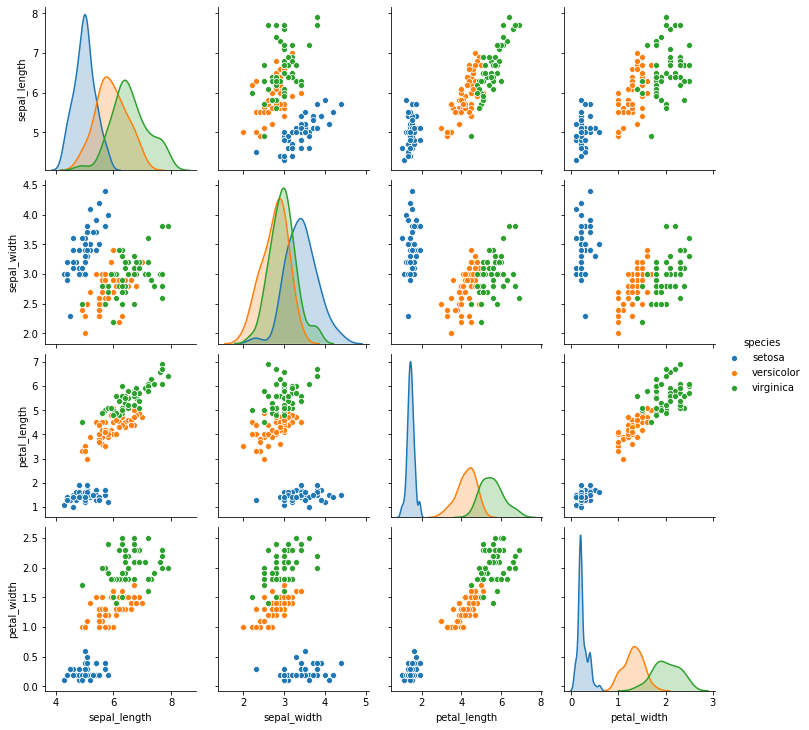

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


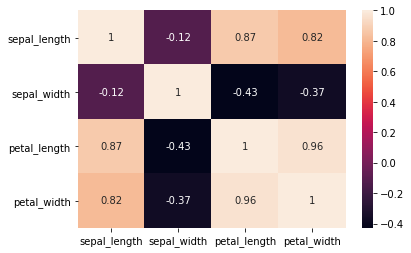

In [2]:
# from seaborn import load_dataset
iris = pd.read_csv('iris.csv', usecols = range(1,6))
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()
sns.heatmap(iris.corr(),annot = iris.corr())
iris

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

**Najmniej skorelowane są atrybuty sepal_width i sepal_length -- wartość ich współczynnika korelacji jest, co do wartości bezwzględnej, najbliższa zera, natomiast najbardziej skorelowane są petal_length i petal_width, gdzie korelacja jest najbliższa 1 co do modułu (0.96)** 

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [3]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [4]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [5]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [6]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

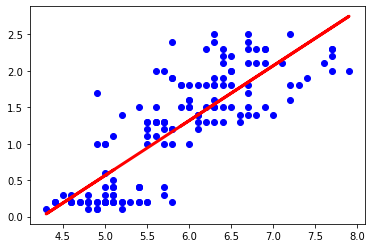

In [7]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [8]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427363

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz wartość bładu średniokwadratowego $e$ dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [9]:
def get_parameters(data, one, two):
    x = data.iloc[:,one].values.reshape(-1,1)
    y = data.iloc[:,two].values.reshape(-1,1)
    regressor = LinearRegression()  
    regressor.fit(x,y)
    w0 = (regressor.intercept_)
    w1 = (regressor.coef_)
    y_pred = regressor.predict(x)
    e = metrics.mean_squared_error(y, y_pred)
    return [w0, w1, e]
w0, w1, e = get_parameters(iris, 0, 3)
print(w0, w1, e)

[-3.200215] [[0.75291757]] 0.19101500769427363


> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (wariancja) modelu jest największa, a dla których - najmniejsza. Czy można zauwazyć zależność tej miary od miary korelacji ?

[3.41894684] [[-0.0618848]] 0.1861043758938136
[-7.10144337] [[1.85843298]] 0.7430610341321241
[-3.200215] [[0.75291757]] 0.19101500769427363
[9.06315061] [[-1.73522152]] 2.5272893400281986
[3.15687229] [[-0.64027659]] 0.49976926485227013
[-0.36307552] [[0.41575542]] 0.04206730919499318


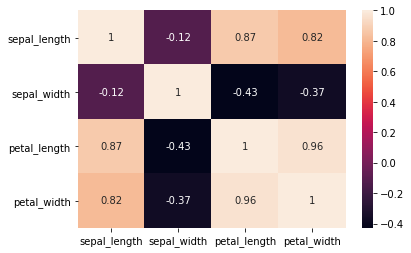

In [10]:
w0, w1, e = get_parameters(iris, 0, 1)
print(w0, w1, e)
w0, w1, e = get_parameters(iris, 0, 2)
print(w0, w1, e)
w0, w1, e = get_parameters(iris, 0, 3)
print(w0, w1, e)
w0, w1, e = get_parameters(iris, 1, 2)
print(w0, w1, e)
w0, w1, e = get_parameters(iris, 1, 3)
print(w0, w1, e)
w0, w1, e = get_parameters(iris, 2, 3)
print(w0, w1, e)
sns.heatmap(iris.corr(),annot = iris.corr())

**Błąd dopasowania jest najmniejszy dla pary atrybutów o indeksach (2,3) -- petal_length i petal_width, a największy dla (1,2) -- mniejszy błąd mamy dla danych silnie skorelowanych, a większy dla słabiej skorelowanych**

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyji wymaga wcześniejszego podziału zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu, drugi - do testowania otrzymanego modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych (danych uczących). Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych danego procesu i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

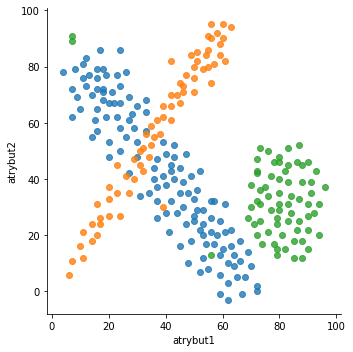

In [11]:
%matplotlib inline
d = pd.read_csv('dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [12]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


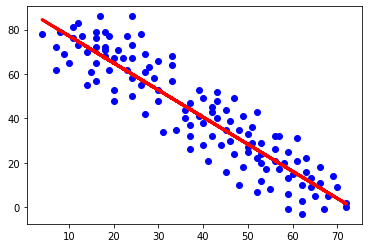

In [13]:
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

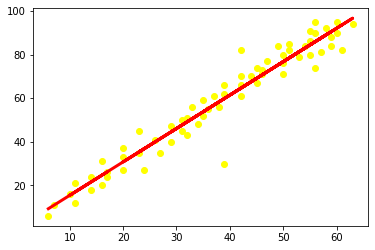

In [14]:
#Dla klasy 2
dd = d[d.klasa == 'klasa 2']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='yellow')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

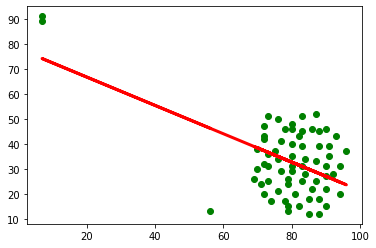

In [15]:
#Dla klasy 1
dd = d[d.klasa == 'klasa 1']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='green')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [16]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

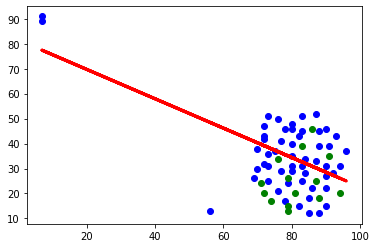

błąd uczenia 143.7605900852357
błąd generalizacji 195.55161262816824


In [17]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele sa bardziej, a dla których - mniej stabilne? Dlaczego?

In [18]:
for label in ['klasa 1', 'klasa 2', 'klasa 3']:
    dd = d[d.klasa == label]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)
    for i in range(0,6):
        x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=None)
        regressor = LinearRegression()  
        regressor.fit(x_ucz,y_ucz) 
        y_pred_ucz = regressor.predict(x_ucz)
        e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
        y_pred_test = regressor.predict(x_test)
        e_test = metrics.mean_squared_error(y_test, y_pred_test)
        print('błąd uczenia dla ', label, ':', e_ucz, '-- próba', i+1)
        print('błąd generalizacji', label, ':', e_test,  '-- próba', i+1)
        print('--------------------------------------------------')

błąd uczenia dla  klasa 1 : 156.44945651589893 -- próba 1
błąd generalizacji klasa 1 : 138.7455940358885 -- próba 1
--------------------------------------------------
błąd uczenia dla  klasa 1 : 130.9840294885949 -- próba 2
błąd generalizacji klasa 1 : 235.8100017066241 -- próba 2
--------------------------------------------------
błąd uczenia dla  klasa 1 : 160.62759109324622 -- próba 3
błąd generalizacji klasa 1 : 126.7548502608543 -- próba 3
--------------------------------------------------
błąd uczenia dla  klasa 1 : 155.61748578486362 -- próba 4
błąd generalizacji klasa 1 : 142.12898598816324 -- próba 4
--------------------------------------------------
błąd uczenia dla  klasa 1 : 148.05310365057733 -- próba 5
błąd generalizacji klasa 1 : 180.37686215982097 -- próba 5
--------------------------------------------------
błąd uczenia dla  klasa 1 : 150.87740179527006 -- próba 6
błąd generalizacji klasa 1 : 163.09040428198776 -- próba 6
-----------------------------------------------

**Dla klas układających się wzdłuż lini prostej stabilność jest zdecydowanie wyższa. Jako najbardziej niestabilna, oraz o największych błędach, wyróżnia się klasa 1, co wynika z jej rozproszenia punktów bez charakterystycznego układania się wzdłuż prostej. Widzimy, że wyniki są najstabilniejsze dla klasy 2, gdzie punkty rozkładają się "najciaśniej" wzdłuż prostej.**

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji, szukając minimum funkcji błędu poprzez przybliżenie wartości parametrów modelu w każdym kolejnym kroku. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 30 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

<IPython.core.display.Javascript object>


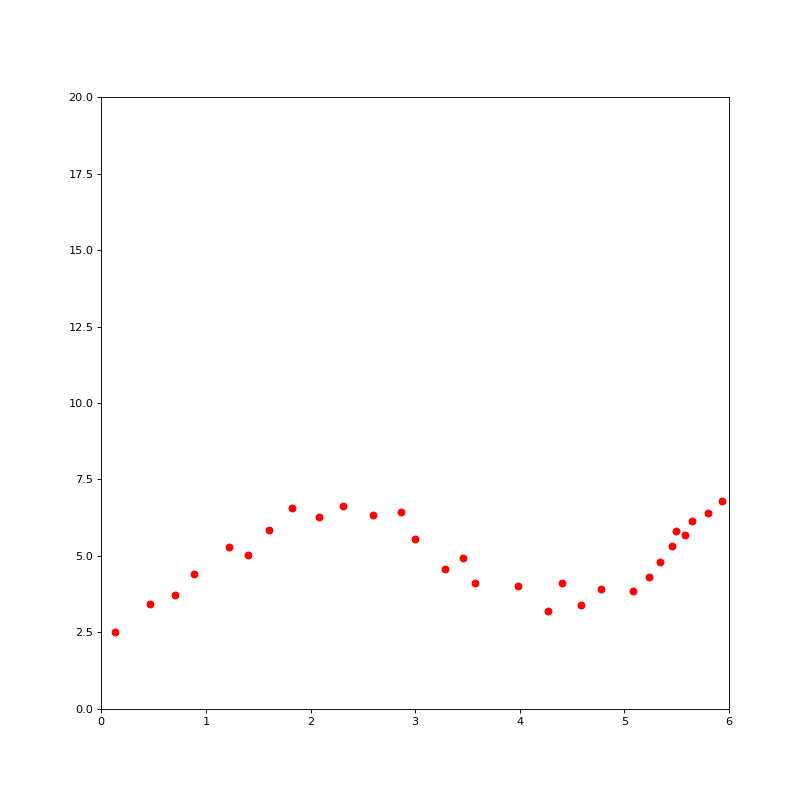

In [2]:
%matplotlib notebook

ile_probek = 30
ile_razy_wiecej = 0
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []

def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print( 'x = %d, y = %d'%(ix, iy))
    ax.plot(ix,iy,'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1,ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx,xx_org+np.random.rand(len(xx_org))/2),axis=0)
                yy = np.concatenate((yy,yy_org+np.random.rand(len(yy_org))/2),axis=0)                
        df = pd.DataFrame({'x': xx, 'y': yy})
cid = fig.canvas.mpl_connect('button_press_event', onclick)

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [3]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


,x,y
0,0.133961,2.496219
1,5.929660,6.800854
2,5.800627,6.396145
3,5.650090,6.138603
4,5.574821,5.697102
5,5.456541,5.329184
6,5.338262,4.814099
7,5.488799,5.807477
8,2.596326,6.322561
9,3.983423,4.004681


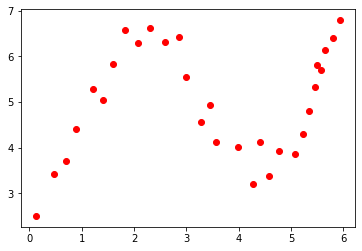

In [4]:
%matplotlib inline
plt.scatter(df.x, df.y, color='red')

In [5]:
%matplotlib inline

> **Zadanie** Napisz funkcję, która utworzy macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [5]:
import numpy as np
def make_vandemort_matrix(poly_degree, x):
    o = np.ones((len(x), 1))
    x_van = np.concatenate((o, x), axis = 1)
    for i in range(2, poly_degree+1):
        x_temp = np.power(x, i)
        x_van = np.concatenate((x_van, x_temp), 1)
    return x_van

x_degrees = np.array([[1,3,4,5,7]]).T
make_vandemort_matrix(4, x_degrees)

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

**Zgodnie z wynikiem testu tworzenie maciezry Vandermode'a działa**

> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [32]:
#podział na zbiór uczący i testowy -- parametry wyliczone dla zbioru uczącego
x = df.x
y = df.y
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.3, random_state=None)
x_ucz_arr = np.array([x_ucz]).T
x_van = make_vandemort_matrix(3, x_ucz_arr)#dla wielomianu 3 stopnia
y_ucz_arr = np.array([y_ucz]).T
x_van_inv = np.linalg.pinv(x_van)
omega = np.dot(x_van_inv, y_ucz_arr)
print("Kolejne parametry omega dla wielomianu to: \n", omega)

Kolejne parametry omega dla wielomianu to: 
 [[ 1.40592796]
 [ 6.28666052]
 [-2.4048002 ]
 [ 0.25337092]]


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje?


In [8]:
x = df.x
y = df.y
x_arr = np.array([x]).T
y_arr = np.array([y]).T

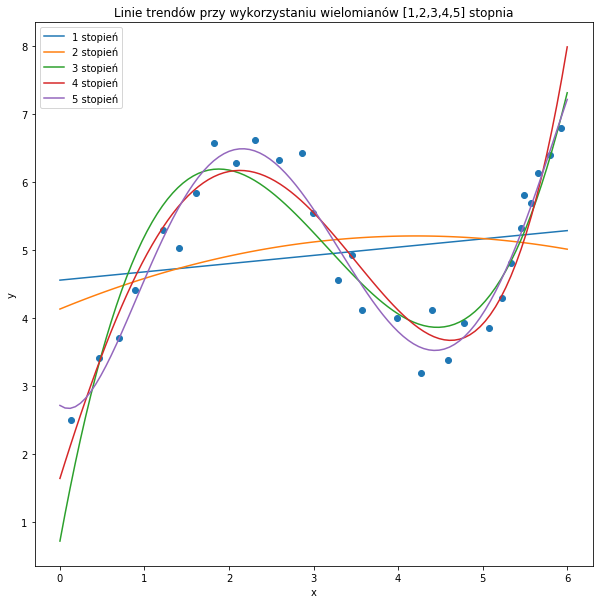

<function matplotlib.pyplot.show(*args, **kw)>

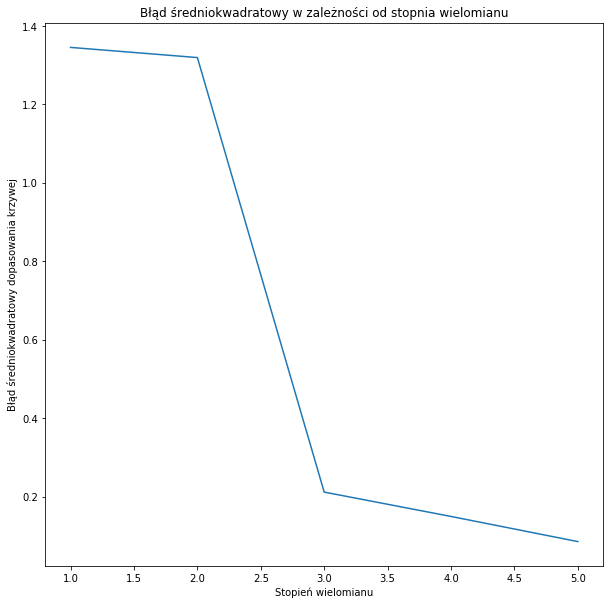

In [25]:
plt.figure(figsize=(10,10))
x_lin = np.linspace(0,6, num=100)
x_lin_arr = np.array([x_lin]).T
plt.scatter(x,y)
degrees = range(1,6) #stopnie wielomianu w analizie
error = np.zeros(len(degrees))

for i in degrees:
    y_pred_dots = 0
    y_pred_lin = 0
    x_van = make_vandemort_matrix(i, x_arr)
    x_van_lin = make_vandemort_matrix(i, x_lin_arr)
    omega = np.dot(np.linalg.pinv(x_van), y_arr)
    y_pred_dots = np.dot(x_van, omega)
    y_pred_lin = np.dot(x_van_lin, omega)
    error[i-1] = metrics.mean_squared_error(y_pred_dots, y_arr)
    plt.plot(x_lin, y_pred_lin)
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linie trendów przy wykorzystaniu wielomianów [1,2,3,4,5] stopnia")
plt.legend(['1 stopień', '2 stopień', '3 stopień', '4 stopień', '5 stopień'])
plt.show()

plt.figure(figsize=(10,10))
plt.title("Błąd średniokwadratowy w zależności od stopnia wielomianu")
plt.plot(degrees, error)
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd średniokwadratowy dopasowania krzywej")
plt.show

**Funkcja ta jest malejąca wraz ze wzrostem stopnia wielomianu -- wynika to z coraz to lepszego dopasowania do punktów zbioru uczącego**

> **Zadanie** Znajdź funkcję wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

**Takie możliwości daje np. funkcja polyfit**

In [31]:
result = np.polyfit(x, y, 3)
result

array([ 0.2697505 , -2.56558222,  6.78198104,  0.72171076])

> **Zadanie** Podziel zbiór na uczący i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów na podstawie zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru?

In [ ]:
x = df.x
y = df.y
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.3, random_state=None)
x_ucz_arr = np.array([x_ucz]).T
y_ucz_arr = np.array([y_ucz]).T
x_test_arr = np.array([x_test]).T
y_test_arr = np.array([y_test]).T

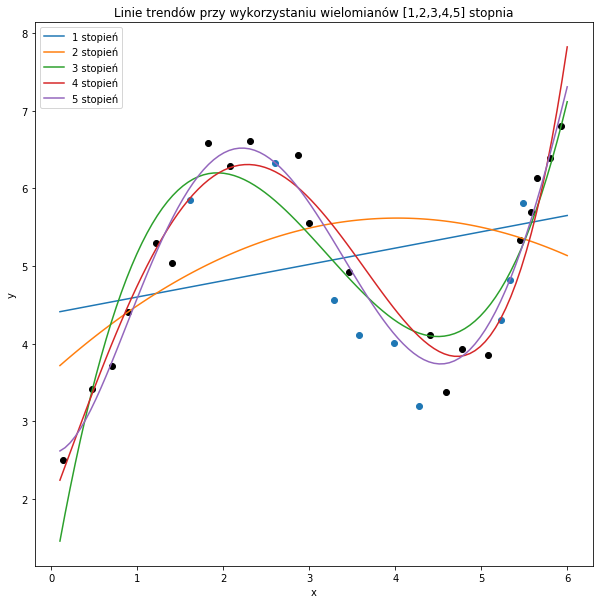

<function matplotlib.pyplot.show(*args, **kw)>

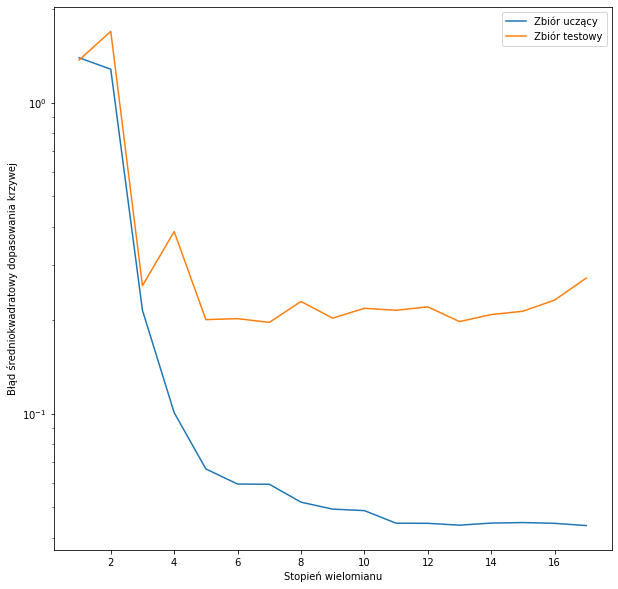

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(x_ucz,y_ucz, color="black")
plt.scatter(x_test,y_test)
plt.legend(['Zbiór uczący', 'Zbiór testowy'])

x_lin = np.linspace(0.1,6, num=100)
x_lin_arr = np.array([x_lin]).T

degrees = range(1,18) #stopnie wielomianu w analizie
error_ucz = np.zeros(len(degrees))
error_test = np.zeros(len(degrees))

for i in degrees:
    y_pred_dots = 0
    y_pred_lin = 0
    x_van_ucz = make_vandemort_matrix(i, x_ucz_arr)
    x_van_test = make_vandemort_matrix(i, x_test_arr)
    x_van_lin = make_vandemort_matrix(i, x_lin_arr)
    omega = np.dot(np.linalg.pinv(x_van_ucz), y_ucz_arr)
    y_pred_ucz = np.dot(x_van_ucz, omega)
    y_pred_test = np.dot(x_van_test, omega)
    y_pred_lin = np.dot(x_van_lin, omega)
    error_ucz[i-1] = metrics.mean_squared_error(y_pred_ucz, y_ucz_arr)
    error_test[i-1] = metrics.mean_squared_error(y_pred_test, y_test_arr)
    if i in [1,2,3,4,5]: #drukuję wykresy dla 5 pierwszych stopni wielomianu analogicznie do poprzedniego zadania
        plt.plot(x_lin, y_pred_lin)
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linie trendów przy wykorzystaniu wielomianów [1,2,3,4,5] stopnia")
plt.legend(['1 stopień', '2 stopień', '3 stopień', '4 stopień', '5 stopień'])
plt.show()

plt.figure(figsize=(10,10))
plt.plot(degrees, error_ucz)
plt.plot(degrees, error_test)
plt.yscale(value="log")
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd średniokwadratowy dopasowania krzywej")
plt.legend(['Zbiór uczący','Zbiór testowy'])
plt.show

**Najlepiej moje punkty danych opisuje 13 stopień wielomianu, mamy w tym przypadku do czynienia zarówno z małym błędem na zbiorze uczącym jak i testowym, co pozwala stwierdzić, że model ma zdolność generalizacji. Dla wyższych stopni, model traci zdolność generalizacji i rośnie błąd na zbiorze testowym.**

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

1. **Jesteśmy w stanie zmniejszyć błąd do 0 dla wielomianów stopnia bliskiego liczbie analizowanych punktów. W przypadku gdy błąd będzie wynosił 0 mamy do czynienia z krzywą idealnego dopasowania, która przechodzi przez wszystkie punkty. Oprócz odpowiedniego stopnia wielomianu, istotne jest również dobre uwarunkowanie tworzonej macierzy Vandermode, w złym przypadku (który trafił mi się podczas analiz i przez którego trochę Pana męczyłem:') błąd może nie zejść poniżej pewnej wartości, co wynika z uwarunkowań numerycznych i kumulowania się elementarnych błędów obliczeniowych.**
2. **Niekoniecznie, wraz z malejącym biasem musimy kontrolować wariancję, która rośnie wraz ze złożonością modelu. "Przeuczony" model może  powodować duże błędy na zbiorze testowym.**
3. **Nie, jeśli jest sprzeczne lub nieoznaczone.**
4. **Maleje bias, ale dla bardzo złożonych modeli rośnie wariancja, co może powodować błędy na zbiorze testowym. Model może stracić zdolność generalizacji dla zbyt wysokiego stopnia wielomianu.**